In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [3]:
# Load dataset
data = pd.read_csv('emotions.csv')


In [5]:
# Explore data
print(data.head())
print(data['label'].value_counts())

   # mean_0_a  mean_1_a  mean_2_a  mean_3_a  mean_4_a  mean_d_0_a  mean_d_1_a  \
0        4.62      30.3    -356.0      15.6      26.3       1.070       0.411   
1       28.80      33.1      32.0      25.8      22.8       6.550       1.680   
2        8.90      29.4    -416.0      16.7      23.7      79.900       3.360   
3       14.90      31.6    -143.0      19.8      24.3      -0.584      -0.284   
4       28.30      31.3      45.2      27.3      24.5      34.800      -5.790   

   mean_d_2_a  mean_d_3_a  mean_d_4_a  ...  fft_741_b  fft_742_b  fft_743_b  \
0      -15.70        2.06        3.15  ...       23.5       20.3       20.3   
1        2.88        3.83       -4.82  ...      -23.3      -21.8      -21.8   
2       90.20       89.90        2.03  ...      462.0     -233.0     -233.0   
3        8.82        2.30       -1.97  ...      299.0     -243.0     -243.0   
4        3.06       41.40        5.52  ...       12.0       38.1       38.1   

   fft_744_b  fft_745_b  fft_746_b  ff

In [7]:
# Map labels
label_mapping = {'NEGATIVE': 0, 'NEUTRAL': 1, 'POSITIVE': 2}
data['label'] = data['label'].replace(label_mapping)

C:\Users\masum\AppData\Local\Temp\ipykernel_248116\2711551662.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['label'] = data['label'].replace(label_mapping)


In [11]:
# Separate features and labels
X = data.drop('label', axis=1).values
y = data['label'].values

In [13]:
# Normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [15]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### 1. Machine Learning Models ###

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


In [22]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print("\nRandom Forest Performance:")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))



Random Forest Performance:
Accuracy: 0.9859375
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       216
           1       1.00      1.00      1.00       215
           2       0.99      0.97      0.98       209

    accuracy                           0.99       640
   macro avg       0.99      0.99      0.99       640
weighted avg       0.99      0.99      0.99       640



In [24]:
# Support Vector Machine
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

In [26]:
print("\nSVM Performance:")
print("Accuracy:", accuracy_score(y_test, svm_pred))
print(classification_report(y_test, svm_pred))


SVM Performance:
Accuracy: 0.9453125
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       216
           1       0.99      0.98      0.98       215
           2       0.94      0.89      0.91       209

    accuracy                           0.95       640
   macro avg       0.95      0.94      0.94       640
weighted avg       0.95      0.95      0.95       640



In [30]:
# Multi-layer Perceptron Classifier
mlp_model = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=300, random_state=42)
mlp_model.fit(X_train, y_train)
mlp_pred = mlp_model.predict(X_test)

print("\nMLP Performance:")
print("Accuracy:", accuracy_score(y_test, mlp_pred))
print(classification_report(y_test, mlp_pred))


MLP Performance:
Accuracy: 0.971875
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       216
           1       1.00      0.98      0.99       215
           2       0.96      0.95      0.96       209

    accuracy                           0.97       640
   macro avg       0.97      0.97      0.97       640
weighted avg       0.97      0.97      0.97       640



### 2. Deep Learning Model ###

In [37]:
pip install tensorflow

  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ---------------------------------------- 48.7/48.7 kB 1.2 MB/s eta 0:00:00
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.2/390.3 MB 4.6 MB/s eta 0:01:25
   ---------------------------------------- 0.3/390.3 MB 3.9 MB/s eta 0:01:40
   ---------------------------------------- 0.5/390.3 MB 3.9 MB/s eta 0:01:40
   ---------------------------------------- 0.7/390.3 MB 4.1 MB/s eta 0:01:35
   ---------------------------------------- 0.9/390.3 MB 4.0 MB/s eta 0:01:38
   ---------------------------------------- 1.1/390.3 MB 4.1 MB/s eta 0:01:36
   ---------------------------

In [38]:
import tensorflow as tf

In [39]:
# Define TensorFlow Model
dl_model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(3, activation='softmax')
])

dl_model.compile(optimizer='adam', 
                 loss='sparse_categorical_crossentropy', 
                 metrics=['accuracy'])

C:\Users\masum\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [45]:
# Train the model
history = dl_model.fit(
    X_train, y_train, 
    validation_split=0.2,
    batch_size=32, 
    epochs=50,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    ]
)


Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9655 - loss: 0.0899 - val_accuracy: 0.9465 - val_loss: 0.2374
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9621 - loss: 0.1531 - val_accuracy: 0.9298 - val_loss: 0.2739
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9631 - loss: 0.1270 - val_accuracy: 0.9632 - val_loss: 0.1098
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9573 - loss: 0.1711 - val_accuracy: 0.9532 - val_loss: 0.2453
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9631 - loss: 0.1372 - val_accuracy: 0.9666 - val_loss: 0.2134
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9817 - loss: 0.0680 - val_accuracy: 0.9666 - val_loss: 0.0952
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9658 - loss: 0.1057 - val_accuracy: 0.9732 - val_loss: 0.0698
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9880 - loss: 0.0454 - val_accuracy: 0.9599 - val_loss:

In [47]:
# Evaluate the model
dl_loss, dl_acc = dl_model.evaluate(X_test, y_test, verbose=0)
print("\nDeep Learning Model Accuracy:", dl_acc)


Deep Learning Model Accuracy: 0.989062488079071


In [49]:
# Predict with DL model
dl_pred = np.argmax(dl_model.predict(X_test), axis=-1)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [51]:
# Classification Report
print("\nDeep Learning Model Performance:")
print(classification_report(y_test, dl_pred))


Deep Learning Model Performance:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       216
           1       1.00      1.00      1.00       215
           2       0.98      0.99      0.98       209

    accuracy                           0.99       640
   macro avg       0.99      0.99      0.99       640
weighted avg       0.99      0.99      0.99       640



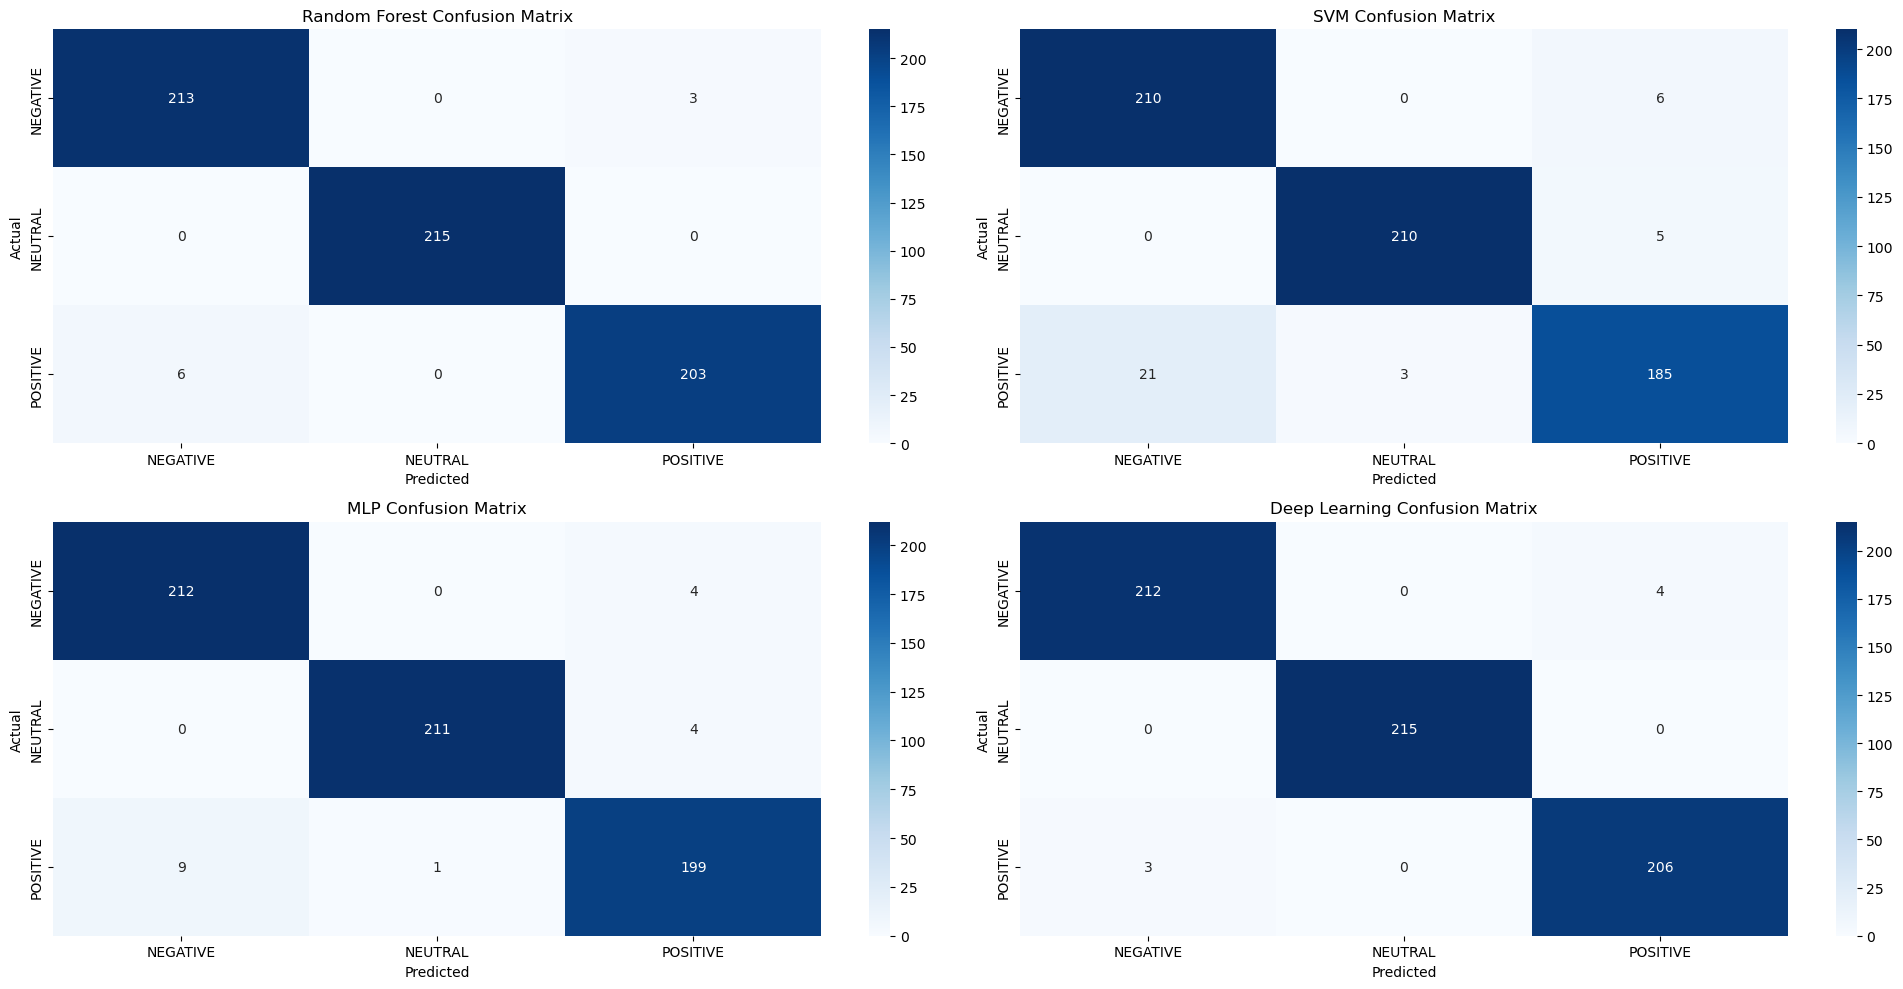

In [53]:
### Confusion Matrices ###

models = {'Random Forest': rf_pred, 'SVM': svm_pred, 'MLP': mlp_pred, 'Deep Learning': dl_pred}
plt.figure(figsize=(20, 10))

for i, (name, pred) in enumerate(models.items(), 1):
    cm = confusion_matrix(y_test, pred)
    plt.subplot(2, 2, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

plt.tight_layout()
plt.show()